<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [8]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


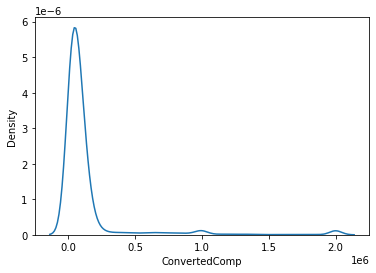

In [5]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False, kde = True)

plt.show()

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

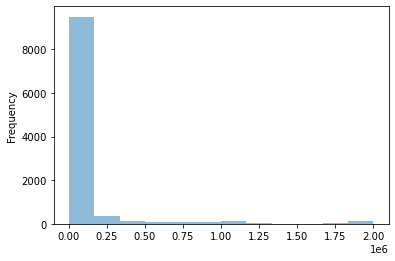

In [6]:
#Histogram
df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)


What is the median of the column `ConvertedComp`?


In [47]:
# Median
df['ConvertedComp'].median()

#df['Age'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [11]:
df['Gender'].value_counts()
print('\n', df['Gender'].eq('Man').sum(), 'respondents identify as "Man"')


 10480 respondents identify as "Man"


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [25]:
df['ConvertedComp'].median()
df_w = df.groupby(["Gender"], as_index=False)["ConvertedComp"].median()
df_w

,Gender,ConvertedComp
0,Man,57744.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
3,Woman,57708.0
4,Woman;Man,21648.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [26]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


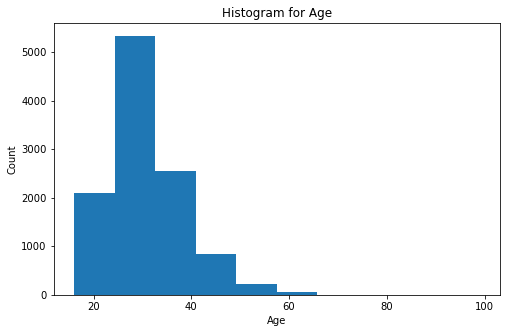

In [34]:
df['Age'].plot(kind='hist', figsize=(8, 5), alpha=1)

plt.title('Histogram for Age') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Age') # add x-label

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


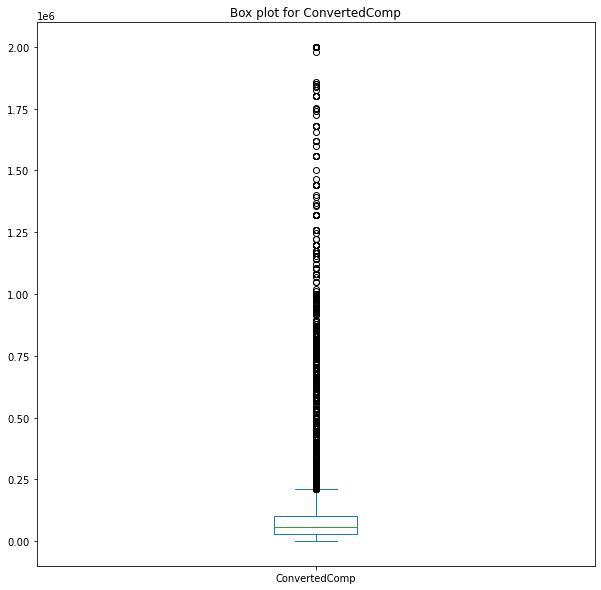

In [64]:
# your code goes here
#df['ConvertedComp'].median()
df['ConvertedComp'].plot(kind='box', figsize=(10,10))
plt.title('Box plot for ConvertedComp') # add a title to the histogram


plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [65]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('The middle quartiles for ConvertedComp range from',Q1, 'to',Q3,'. The interquartile range is',IQR)

The middle quartiles for ConvertedComp range from 26868.0 to 100000.0 . The interquartile range is 73132.0


Find out the upper and lower bounds.


In [66]:
lower_val = df['ConvertedComp'].min()
upper_val = df['ConvertedComp'].max()
print('The min/max for ConvertedComp are',lower_val, 'and', upper_val)


The min/max for ConvertedComp are 0.0 and 2000000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [67]:
print('Outliers below:',df['ConvertedComp'].lt(Q1 - 1.5*IQR).sum())
print('Outliers above:',df['ConvertedComp'].gt(Q3 + 1.5*IQR).sum())
print('Median with outliers:',df['Age'].median())
print('Median with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median())
print('Mean with outliers removed:',df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean())


Outliers below: 0
Outliers above: 879
Median with outliers: 29.0
Median with outliers removed: 52704.0
Mean with outliers removed: 59883.20838915799


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [68]:
print(df.shape)
print(df['ConvertedComp'].gt(Q3 + 1.5*IQR).shape)
df1 = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]
print('total number in new dataset:',df1.shape[0])
df[df['ConvertedComp'].gt(Q3 + 1.5*IQR)].shape
print('total number of outliers removed:',df1.shape[0])
df3 = df[df['ConvertedComp'].isnull()]
print('total number of nulls removed:',df3.shape[0])
print('total of outliers + inliers + nulls:', (9703 + 879 + 816))


(11398, 85)
(11398,)
total number in new dataset: 9703
total number of outliers removed: 9703
total number of nulls removed: 816
total of outliers + inliers + nulls: 11398


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [69]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
